In [1]:
import pandas as pd

dataset = pd.read_csv('new.csv', usecols=['date', 'time', 'price'])

In [2]:
dataset

,date,time,price
0,20150105,100100,1064.0
1,20150105,100200,1064.0
2,20150105,100300,1064.0
3,20150105,100400,1064.0
4,20150105,100500,1064.0
...,...,...,...
262103,20161230,183800,1248.5
262104,20161230,183900,1248.5
262105,20161230,184000,1248.5
262106,20161230,184600,1247.5


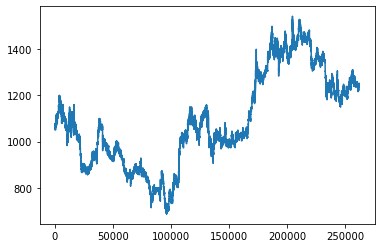

In [3]:
import matplotlib.pyplot as plt

price = dataset['price']

plt.plot(price)
plt.show()

In [4]:
import numpy as np

class Money_up_machine:
    
    def __init__(self, low_perc, high_perc, time_window, budget):
        self.low_perc = low_perc
        self.high_perc = high_perc
        self.time_window = time_window
        self.budget = budget
        self.start_budget = budget
        self.memory = []
        self.shares_number = 0
        self.last_bought_price = 0
        
    def fit(self, date, time, price):
        min_cur_price = 0
        max_cur_price = 0
        
        window_space = np.zeros(self.time_window)
        
        for itr in range(self.time_window, len(price)):
            
            window_space = price[itr-self.time_window:itr] #move window
            
            min_cur_price = np.min(window_space)
            max_cur_price = np.max(window_space)
                
            perc_change_min = window_space[itr-1]*100/min_cur_price - 100 # percentage of change
            perc_change_max = window_space[itr-1]*100/max_cur_price - 100
            
            #tip not to take bad percantage chance
            if perc_change_max > -1:       
                perc_change = perc_change_min
            else:
                perc_change = perc_change_max
                

            if np.sign(perc_change) > 0 and perc_change >= self.high_perc and self.shares_number > 0:        
                self.sell_all(itr, price[itr], date[itr], time[itr])
                   
            elif np.sign(perc_change) < 0 and perc_change <= self.low_perc and self.budget >= price[itr]:
                self.buy_all(itr, price[itr], date[itr], time[itr])
                
            if itr == len(price)-1 and self.shares_number > 0:
                self.sell_all(itr, price[itr], date[itr], time[itr])
                
                
    def buy_all(self, itr, price, date, time):        
        while self.budget > price:
            self.shares_number += 1
            self.budget -= price
            
        self.last_bought_price = price
        
        date = str(date)
        print(f'Date: {date[:4]}-{date[4:6]}-{date[6:]},\
        Bought: {self.shares_number},\
        your budget: {self.budget}\n')
        
        cur_archieve = {'iter':itr,
                        'shares_num':self.shares_number,
                        'budget':self.budget,
                        'date':date,
                        'price':price,
                        'time':time,
                        'action':'buy'}
        
        self.memory.append(cur_archieve)
            
    
    def sell_all(self, itr, price, date, time):
        self.budget += price * self.shares_number
        
        date = str(date)
        
        print(f'Date: {date[:4]}-{date[4:6]}-{date[6:]},\
        Sold: {self.shares_number},\
        Difference: {price - self.last_bought_price},\
        your budget: {self.budget}\n')
        
        self.shares_number = 0
        
        cur_archieve = {'iter':itr,
                        'shares_num':self.shares_number,
                        'budget':self.budget,
                        'price':price,
                        'date':date,
                        'time':time,
                        'action':'sold'}
        
        
        self.memory.append(cur_archieve)
            
    
    def report(self, price):
        plt.plot(price)
        
        for i in range(len(self.memory)):
            if self.memory[i]['action'] == 'sold':
                plt.scatter(self.memory[i]['iter'], self.memory[i]['price'], color='red', s=40)
            else:
                plt.scatter(self.memory[i]['iter'], self.memory[i]['price'], color='green', s=40)
            
        plt.show()

Смысл стратегии заключается в том, что есть временное окно, в промежутке которого алгоритм смотрит изменение цены акции в процентах. 
low_perc - нижний порог падения акций, после которого считается что нужно покупать акции; 
high_perc - верхний порог роста акций, после которого считается что нужно продавать акции.

Date: 2015-03-06,        Bought: 2,        your budget: 78.0

Date: 2015-04-21,        Sold: 2,        Difference: 133.0,        your budget: 2266.0

Date: 2015-08-24,        Bought: 3,        your budget: 37.0

Date: 2015-10-27,        Sold: 3,        Difference: 138.0,        your budget: 2680.0

Date: 2016-01-20,        Bought: 2,        your budget: 823.5999999999999

Date: 2016-04-28,        Sold: 2,        Difference: 323.29999999999995,        your budget: 3326.6

Date: 2016-10-17,        Bought: 2,        your budget: 956.5999999999999

Date: 2016-12-30,        Sold: 2,        Difference: 62.5,        your budget: 3451.6



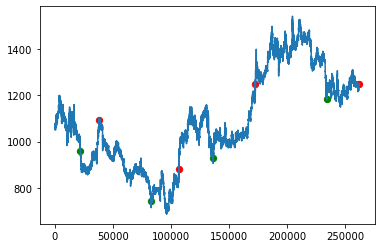

In [5]:
#Green - bought
#Red   - sold

mum = Money_up_machine(low_perc=-20, high_perc=28, time_window=20000, budget=2000)
mum.fit(dataset['date'], dataset['time'], dataset['price'])
mum.report(price)